In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

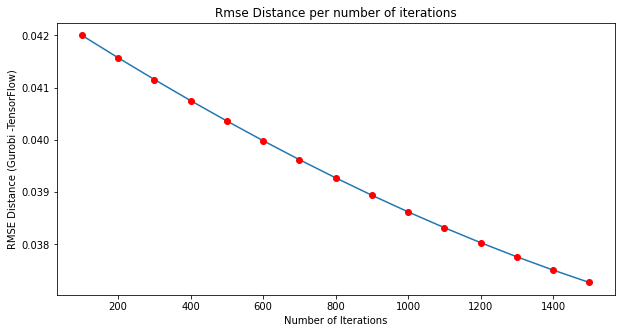

N_ITER        RMSE_DISTANCE
100           0.04200242891442501
200           0.041573210061181684
300           0.04115668098900503
400           0.04075314794834336
500           0.04036291962503281
600           0.03998638519089452
700           0.0396239350426963
800           0.039275959111501065
900           0.03894281458310006
1000          0.038624757312358225
1100          0.03832214914578782
1200          0.03803535891861424
1300          0.037764747653574536
1400          0.03751066183565728
1500          0.03727331473472681


In [5]:
path = "../../../log/Prove-4/Versicolor/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


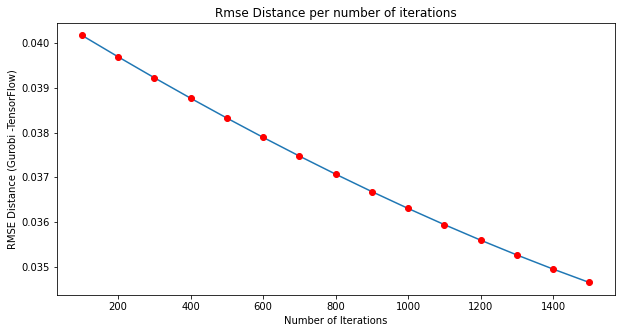

N_ITER        RMSE_DISTANCE
100           0.040176468508215414
200           0.039695330075662144
300           0.03922603044899881
400           0.03876886583872677
500           0.03832416016466763
600           0.03789234980822494
700           0.03747387956870929
800           0.03706906994481211
900           0.036678119892073265
1000          0.03630132369135408
1100          0.03593912014233182
1200          0.03559195472770151
1300          0.035260208847386086
1400          0.03494404911874927
1500          0.03464371065021342


In [6]:
path = "../../../log/Prove-4/Versicolor/c1_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

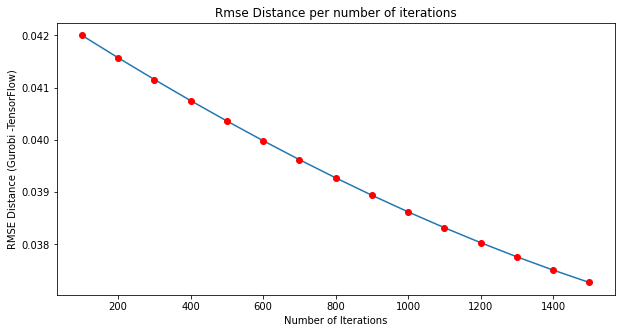

N_ITER        RMSE_DISTANCE
100           0.04200242891442501
200           0.041573210061181684
300           0.04115668098900503
400           0.04075314794834336
500           0.04036291962503281
600           0.03998638519089452
700           0.0396239350426963
800           0.039275959111501065
900           0.03894281458310006
1000          0.038624757312358225
1100          0.03832214914578782
1200          0.03803535891861424
1300          0.037764747653574536
1400          0.03751066183565728
1500          0.03727331473472681


In [7]:
path = "../../../log/Prove-4/Versicolor/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

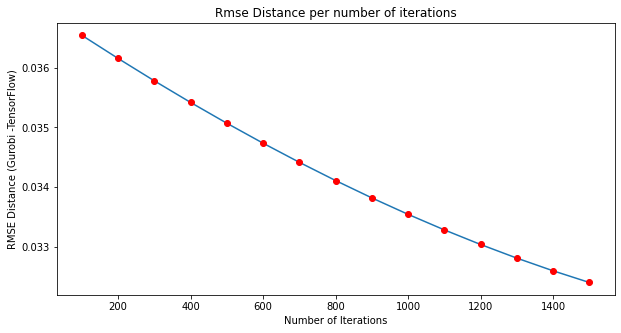

N_ITER        RMSE_DISTANCE
100           0.036542932606874814
200           0.036154901281131635
300           0.03577962257939114
400           0.035417475086826605
500           0.035068864624116916
600           0.034734198429626925
700           0.03441382768936964
800           0.03410802244723544
900           0.03381714064219853
1000          0.033541356952750255
1100          0.033280895335359745
1200          0.033036115323225666
1300          0.0328073673783434
1400          0.03259490146705323
1500          0.032398921031178585


In [8]:
path = "../../../log/Prove-4/Versicolor/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


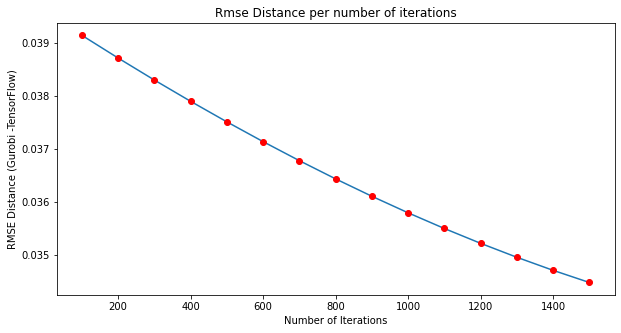

N_ITER        RMSE_DISTANCE
100           0.03914709497750746
200           0.038718120355726464
300           0.03830258240262001
400           0.037900809249943004
500           0.037512881106521345
600           0.03713917545635135
700           0.036780125155326464
800           0.03643616386114756
900           0.03610772147564176
1000          0.0357952236956968
1100          0.03549891790934863
1200          0.03521894153175892
1300          0.034955408426506095
1400          0.03470865796887303
1500          0.03447905052270624


In [9]:
path = "../../../log/Prove-4/Versicolor/c1_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

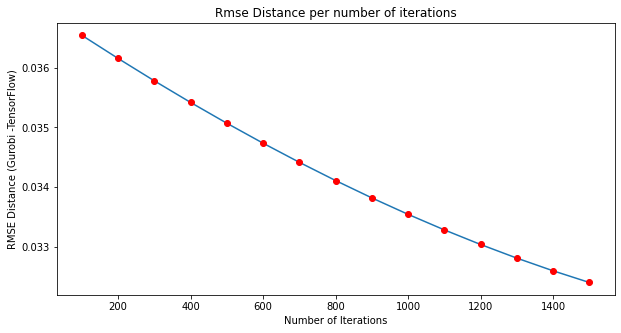

N_ITER        RMSE_DISTANCE
100           0.036542932606874814
200           0.036154901281131635
300           0.03577962257939114
400           0.035417475086826605
500           0.035068864624116916
600           0.034734198429626925
700           0.03441382768936964
800           0.03410802244723544
900           0.03381714064219853
1000          0.033541356952750255
1100          0.033280895335359745
1200          0.033036115323225666
1300          0.0328073673783434
1400          0.03259490146705323
1500          0.032398921031178585


In [10]:
path = "../../../log/Prove-4/Versicolor/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

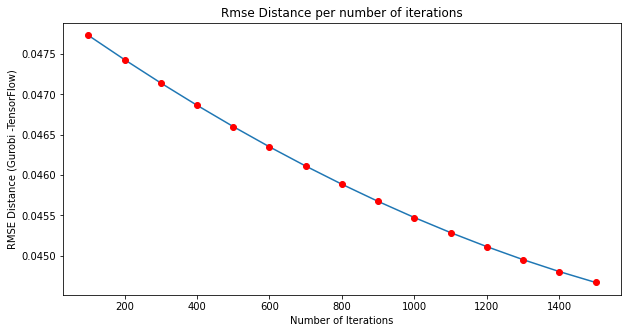

N_ITER        RMSE_DISTANCE
100           0.04773216923868093
200           0.04743085170720838
300           0.047141783125298035
400           0.046865185432936676
500           0.04660121492048026
600           0.04634987655593766
700           0.046111343328762225
800           0.04588569618780741
900           0.04567287057165179
1000          0.045472953727234915
1100          0.04528595719818045
1200          0.045111877105839984
1300          0.04495084086666325
1400          0.04480296168752517
1500          0.04466831445782194


In [11]:
path = "../../../log/Prove-4/Versicolor/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


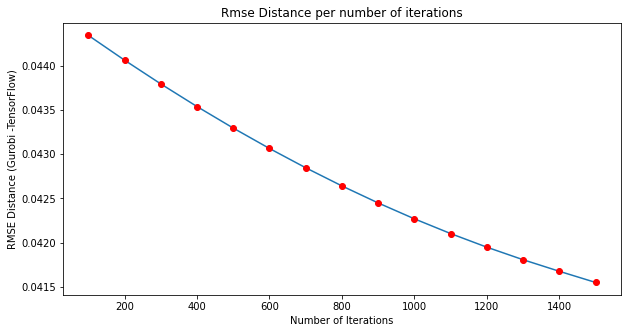

N_ITER        RMSE_DISTANCE
100           0.04434555573182298
200           0.04406477928036855
300           0.043796160930925476
400           0.04353990689544188
500           0.043296213925095826
600           0.04306523515063612
700           0.04284695678048797
800           0.042641437328756436
900           0.04244880249416118
1000          0.04226906969206965
1100          0.04210220135580296
1200          0.041948078163942186
1300          0.041806264050355486
1400          0.041675334293769926
1500          0.041549152033330705


In [12]:
path = "../../../log/Prove-4/Versicolor/c1_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

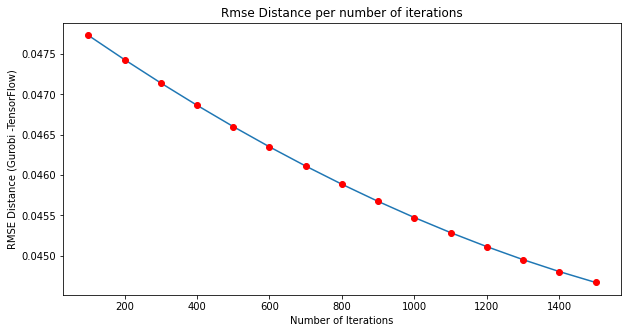

N_ITER        RMSE_DISTANCE
100           0.04773216923868093
200           0.04743085170720838
300           0.047141783125298035
400           0.046865185432936676
500           0.04660121492048026
600           0.04634987655593766
700           0.046111343328762225
800           0.04588569618780741
900           0.04567287057165179
1000          0.045472953727234915
1100          0.04528595719818045
1200          0.045111877105839984
1300          0.04495084086666325
1400          0.04480296168752517
1500          0.04466831445782194


In [13]:
path = "../../../log/Prove-4/Versicolor/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

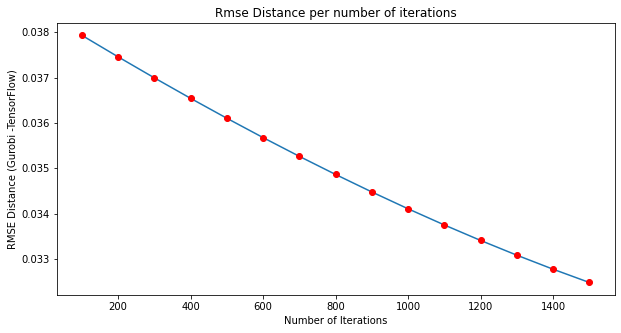

N_ITER        RMSE_DISTANCE
100           0.03793027529772159
200           0.037455601230550105
300           0.03699231261204047
400           0.036540842725445284
500           0.036101635249905104
600           0.035675142410880704
700           0.035261825782563656
800           0.034862151825757165
900           0.03447647229724022
1000          0.03410519305043048
1100          0.03374878891921816
1200          0.03340773813652144
1300          0.033082423625441525
1400          0.032773201367054576
1500          0.032480406536843864


In [14]:
path = "../../../log/Prove-4/Versicolor/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


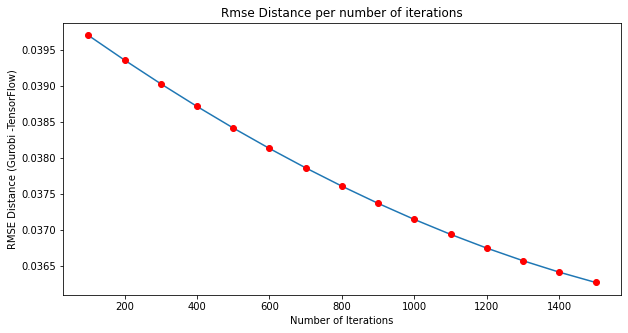

N_ITER        RMSE_DISTANCE
100           0.03970345306467955
200           0.03935962063423514
300           0.03903016931209628
400           0.0387153446269977
500           0.03841546233529779
600           0.03813072899828962
700           0.03786106250815391
800           0.03760658080496756
900           0.03736748896327595
1000          0.037144083277028284
1100          0.03693664856056102
1200          0.036745318576683464
1300          0.03657011633598923
1400          0.036411141151454475
1500          0.03626855834646798


In [15]:
path = "../../../log/Prove-4/Versicolor/c75_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

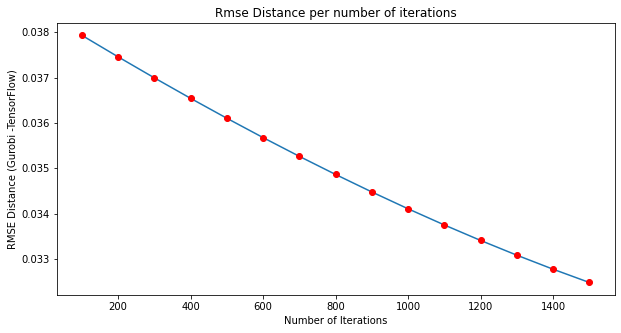

N_ITER        RMSE_DISTANCE
100           0.03793027529772159
200           0.037455601230550105
300           0.03699231261204047
400           0.036540842725445284
500           0.036101635249905104
600           0.035675142410880704
700           0.035261825782563656
800           0.034862151825757165
900           0.03447647229724022
1000          0.03410519305043048
1100          0.03374878891921816
1200          0.03340773813652144
1300          0.033082423625441525
1400          0.032773201367054576
1500          0.032480406536843864


In [16]:
path = "../../../log/Prove-4/Versicolor/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

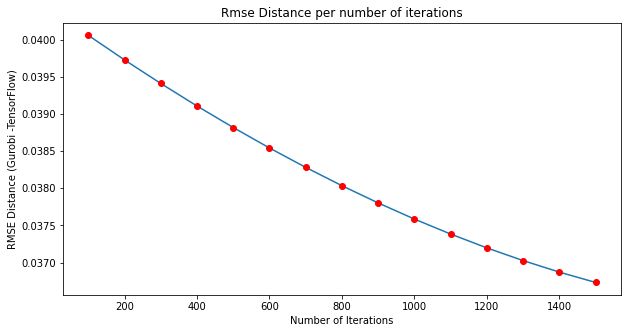

N_ITER        RMSE_DISTANCE
100           0.040057182537272105
200           0.03972689115194165
300           0.03941006999212482
400           0.039106862541011055
500           0.03881757446379804
600           0.03854235514503384
700           0.03828133941730247
800           0.038034811358522214
900           0.03780305330294306
1000          0.037586232404985
1100          0.03738453812185333
1200          0.037198215926754666
1300          0.03702749821345563
1400          0.03687259377078102
1500          0.03673357442258679


In [17]:
path = "../../../log/Prove-4/Versicolor/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


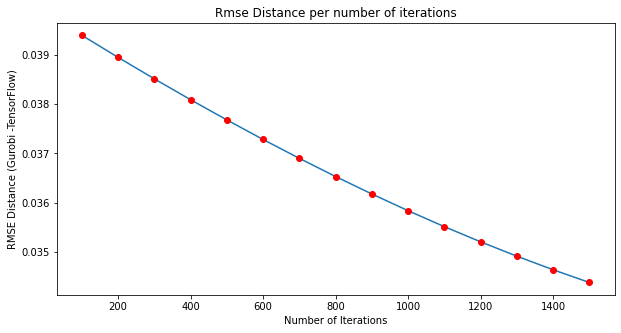

N_ITER        RMSE_DISTANCE
100           0.03939178824432627
200           0.03894462528821523
300           0.03850954862629502
400           0.038086971902329674
500           0.03767731625475183
600           0.037281006562616195
700           0.0368984736387966
800           0.036530148666868295
900           0.0361764654265054
1000          0.03583785714628007
1100          0.035514703535309035
1200          0.035207298432717485
1300          0.03491604440180941
1400          0.03464112034802285
1500          0.034382766586243195


In [18]:
path = "../../../log/Prove-4/Versicolor/c75_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

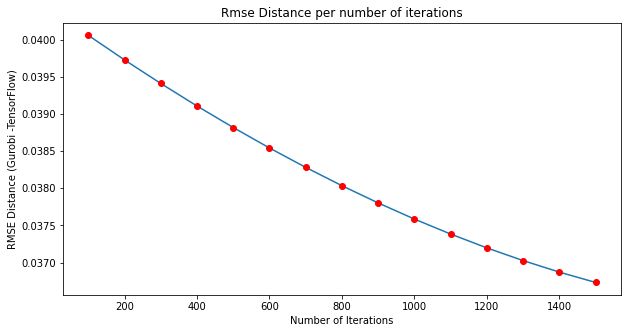

N_ITER        RMSE_DISTANCE
100           0.040057182537272105
200           0.03972689115194165
300           0.03941006999212482
400           0.039106862541011055
500           0.03881757446379804
600           0.03854235514503384
700           0.03828133941730247
800           0.038034811358522214
900           0.03780305330294306
1000          0.037586232404985
1100          0.03738453812185333
1200          0.037198215926754666
1300          0.03702749821345563
1400          0.03687259377078102
1500          0.03673357442258679


In [19]:
path = "../../../log/Prove-4/Versicolor/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

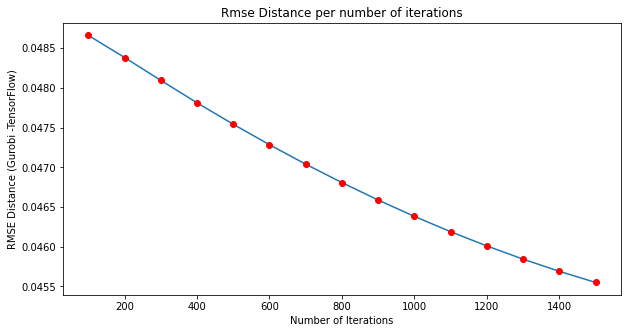

N_ITER        RMSE_DISTANCE
100           0.04866283321665691
200           0.048383853001808134
300           0.04809620310707189
400           0.04781353083569264
500           0.047543272946609094
600           0.04728553042656927
700           0.047040428023139264
800           0.04680815599309456
900           0.046588900783586275
1000          0.04638283607748928
1100          0.04619003359102613
1200          0.04601053863587745
1300          0.04584422907422195
1400          0.04569103448698745
1500          0.04555101614327439


In [20]:
path = "../../../log/Prove-4/Versicolor/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


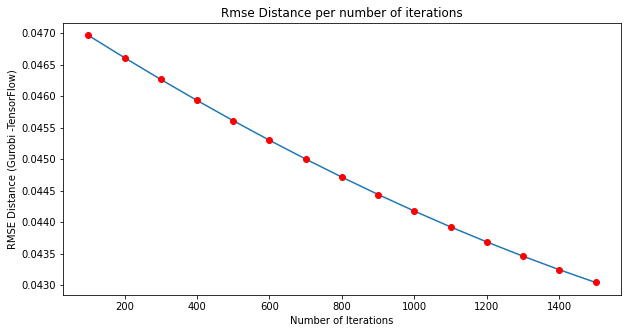

N_ITER        RMSE_DISTANCE
100           0.04696570334561324
200           0.046610398678876015
300           0.046266057473843415
400           0.04593281561188044
500           0.04561089958790851
600           0.04530047673479726
700           0.04500162585950479
800           0.04471449235890827
900           0.04443921786011605
1000          0.04417593551397875
1100          0.04392474715286728
1200          0.04368579591359889
1300          0.04345922802128197
1400          0.043245025760801296
1500          0.043043199837019


In [21]:
path = "../../../log/Prove-4/Versicolor/c75_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

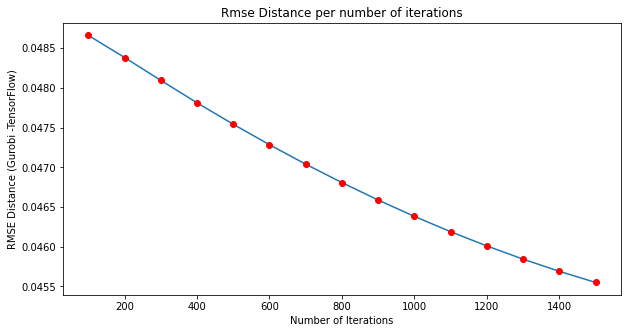

N_ITER        RMSE_DISTANCE
100           0.04866283321665691
200           0.048383853001808134
300           0.04809620310707189
400           0.04781353083569264
500           0.047543272946609094
600           0.04728553042656927
700           0.047040428023139264
800           0.04680815599309456
900           0.046588900783586275
1000          0.04638283607748928
1100          0.04619003359102613
1200          0.04601053863587745
1300          0.04584422907422195
1400          0.04569103448698745
1500          0.04555101614327439


In [22]:
path = "../../../log/Prove-4/Versicolor/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

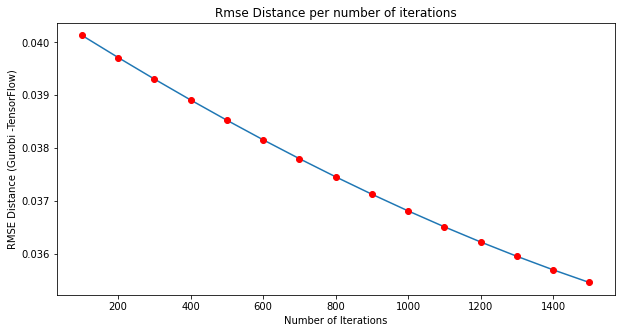

N_ITER        RMSE_DISTANCE
100           0.0401339973175348
200           0.0397139282106437
300           0.03930581711868098
400           0.03890993728316367
500           0.03852659734784843
600           0.038156174944610315
700           0.03779904657579891
800           0.03745544249845714
900           0.037125546872214324
1000          0.03680971670218865
1100          0.036508315697234436
1200          0.03622170391202936
1300          0.03595023496921375
1400          0.035694254226924585
1500          0.035454097992110786


In [23]:
path = "../../../log/Prove-4/Versicolor/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


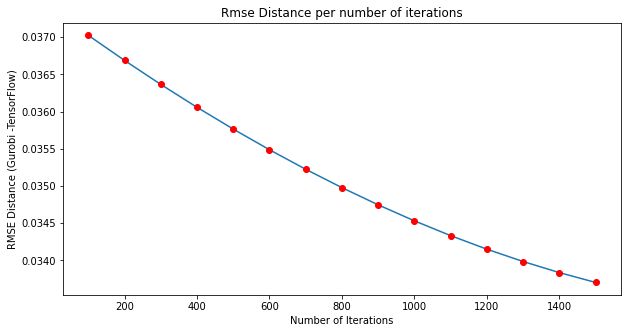

N_ITER        RMSE_DISTANCE
100           0.037025653557840474
200           0.03668858180077614
300           0.03636608856677981
400           0.03605838820725704
500           0.035765624844524155
600           0.035487796936688555
700           0.03522518447008522
800           0.034978129372120026
900           0.03474696109184006
1000          0.03453188048019091
1100          0.034333115898241603
1200          0.03415081969716825
1300          0.03398503987700672
1400          0.033835973128362944
1500          0.03370370669718562


In [24]:
path = "../../../log/Prove-4/Versicolor/c200_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

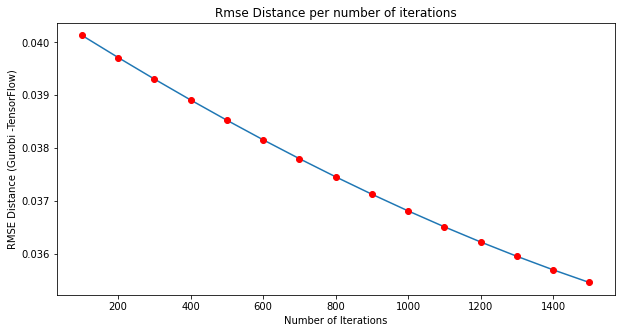

N_ITER        RMSE_DISTANCE
100           0.0401339973175348
200           0.0397139282106437
300           0.03930581711868098
400           0.03890993728316367
500           0.03852659734784843
600           0.038156174944610315
700           0.03779904657579891
800           0.03745544249845714
900           0.037125546872214324
1000          0.03680971670218865
1100          0.036508315697234436
1200          0.03622170391202936
1300          0.03595023496921375
1400          0.035694254226924585
1500          0.035454097992110786


In [25]:
path = "../../../log/Prove-4/Versicolor/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

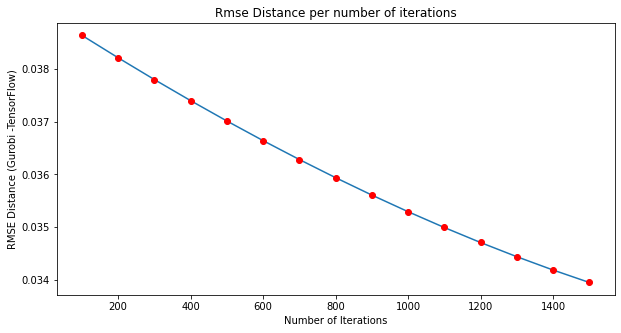

N_ITER        RMSE_DISTANCE
100           0.038635821023923295
200           0.03821055186914915
300           0.03779811226244868
400           0.03739892591601939
500           0.037013348513794946
600           0.03664143810969647
700           0.03628347259724714
800           0.03593959824790116
900           0.03561011934150177
1000          0.03529530562398931
1100          0.034995542517463875
1200          0.03471121967321996
1300          0.03444271941258525
1400          0.03419032622584124
1500          0.03395429188474901


In [26]:
path = "../../../log/Prove-4/Versicolor/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


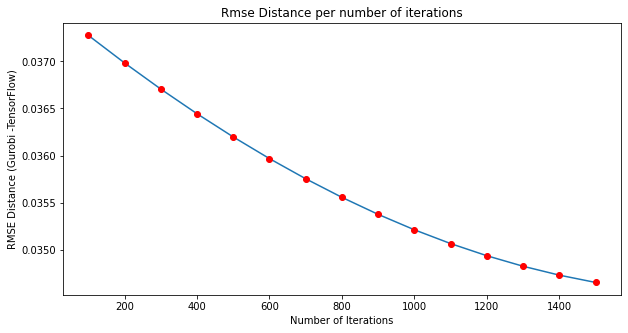

N_ITER        RMSE_DISTANCE
100           0.03727537340170895
200           0.036982914127117544
300           0.03670564862840465
400           0.03644379902424136
500           0.036197695465064586
600           0.03596763627335571
700           0.03575379141201916
800           0.035556428717439664
900           0.0353758245829931
1000          0.03521223565143049
1100          0.035065899399176426
1200          0.03493698115449898
1300          0.034825453759630955
1400          0.034731041274551726
1500          0.03465367586812669


In [27]:
path = "../../../log/Prove-4/Versicolor/c200_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

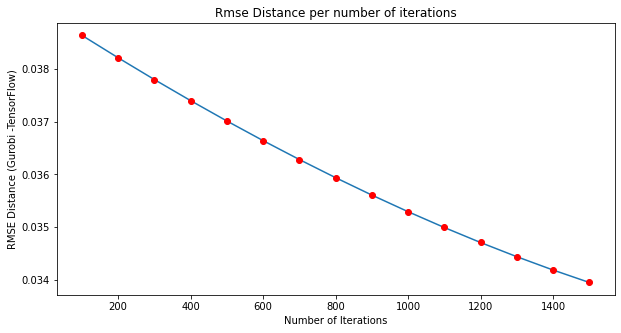

N_ITER        RMSE_DISTANCE
100           0.038635821023923295
200           0.03821055186914915
300           0.03779811226244868
400           0.03739892591601939
500           0.037013348513794946
600           0.03664143810969647
700           0.03628347259724714
800           0.03593959824790116
900           0.03561011934150177
1000          0.03529530562398931
1100          0.034995542517463875
1200          0.03471121967321996
1300          0.03444271941258525
1400          0.03419032622584124
1500          0.03395429188474901


In [28]:
path = "../../../log/Prove-4/Versicolor/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

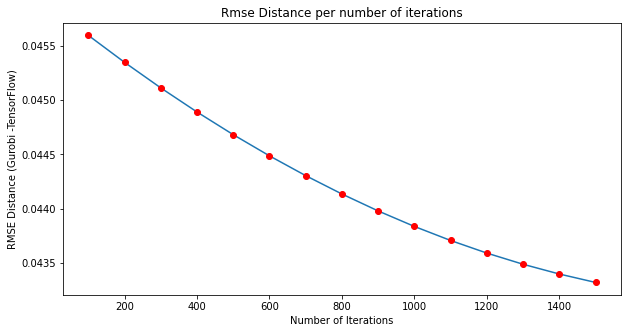

N_ITER        RMSE_DISTANCE
100           0.04559757669959963
200           0.04534903731789418
300           0.04511370068277904
400           0.04489159601571086
500           0.04468283641957134
600           0.044487472777601955
700           0.04430518758998963
800           0.04413596516250945
900           0.04397992721064534
1000          0.04383717349749041
1100          0.04370777644613992
1200          0.043591672035893335
1300          0.04348877677977593
1400          0.04339890774164118
1500          0.043321307389438034


In [29]:
path = "../../../log/Prove-4/Versicolor/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


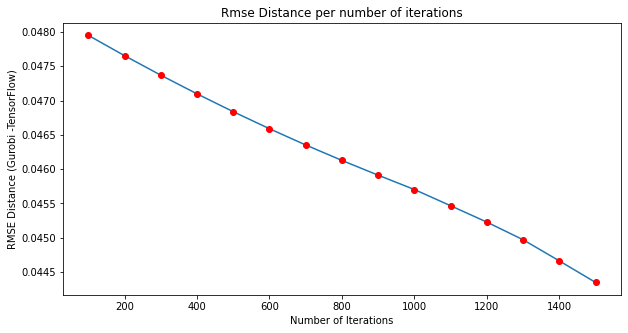

N_ITER        RMSE_DISTANCE
100           0.047949405592331275
200           0.04765335327154611
300           0.047369228319784434
400           0.04709717248917938
500           0.046837180770550456
600           0.04658891229951117
700           0.046352217959196244
800           0.046126879194079075
900           0.0459119608930624
1000          0.04570282402568376
1100          0.04546672655592661
1200          0.04522804580613786
1300          0.044971261662148175
1400          0.04466304546959439
1500          0.04434918801792179


In [30]:
path = "../../../log/Prove-4/Versicolor/c200_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

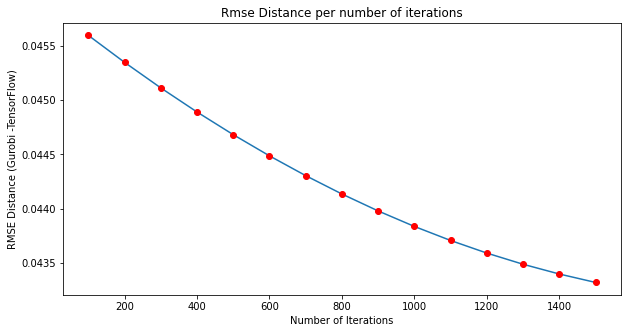

N_ITER        RMSE_DISTANCE
100           0.04559757669959963
200           0.04534903731789418
300           0.04511370068277904
400           0.04489159601571086
500           0.04468283641957134
600           0.044487472777601955
700           0.04430518758998963
800           0.04413596516250945
900           0.04397992721064534
1000          0.04383717349749041
1100          0.04370777644613992
1200          0.043591672035893335
1300          0.04348877677977593
1400          0.04339890774164118
1500          0.043321307389438034


In [31]:
path = "../../../log/Prove-4/Versicolor/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)